In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
CPI = ts.get_cpi()#获取cpi数据
print(CPI.head())#前五行数据，打印print(rate.tail())后五行数据


     month     cpi
0  2018.12  101.86
1  2018.11  102.18
2  2018.10  102.54
3   2018.9  102.50
4   2018.8  102.30


#tushare获取数据的命令为get_xx，xx为相应指标名字，很直观。如获取存款利率命令为ts.get_deposit_rate()，贷款利率ts.get_loan_rate()，\n存款准备金率ts.get_rrr()。下面主要以CPI、GDP、M1、M2为例进行分析

In [3]:
CPI =CPI.sort_values('month')#根据时间顺序，升序
CPI['cpi'] = CPI['cpi']-100.0#转换成百分比数据
CPI.to_csv('E:\\300 数据时代\\数据分析\\cpi.csv')#保存

Text(0.5,1,'CPI月度同比')

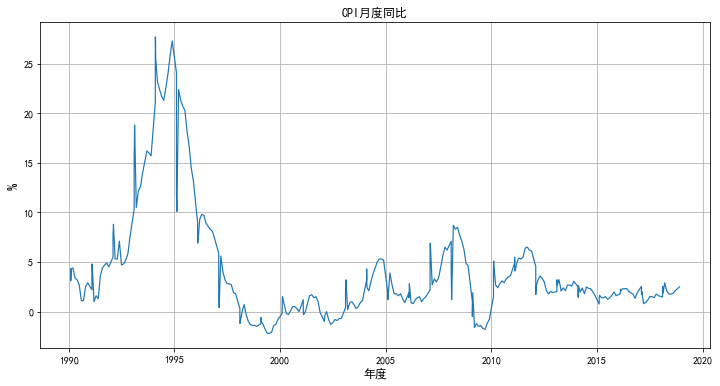

In [4]:
df = pd.read_csv('E:\\300 数据时代\\数据分析\\cpi.csv',engine='python')
plt.figure(figsize=(12,6))
#设置图形大小
plt.plot(df['month'],df['cpi'],linewidth=1.2)
#设置x,y轴数据
plt.grid(True)
plt.axis('tight')
plt.xlabel('年度',size=12)
plt.ylabel('%',size=15)
plt.title('CPI月度同比',size=12)

#从上图中可以清晰地看出，93、94年出现超20%的高通货膨胀，当时还伴随着资产价格泡沫，“股票热”、“期货热”、“房地产热”。以史明鉴，可以知兴替。
我们当时是怎么走过这一段风雨飘摇历程的，Very interesting！回顾历史，有很多值得我们反思和借鉴的地方。此处不详细展开分析，对当时经济金融形势和
ZF如何治理宏观风险感兴趣的童鞋，可以翻阅这一时期的历史资料学习下。

再来看看货币供应量M1和M2的情况。首先了解下货币供应量的几个指标含义。根据货币金融学和央行实践，整个经济体系的货币供应大致可分为M0、M1、M2及M3。

M0：居民持有的货币（即市场上流通的货币）。

M1：居民持有的货币＋银行客户的活期存款。M1又称为狭义货币供应量。

M2：M1＋银行客户的储蓄及定期存款，以及由银行发行的可转让存款证（由非银行持有），又称为广义货币供应量。

M3：M1＋M2＋有限制牌照银行及接受存款公司的客户存款，及由上述机构发行的存款证（由非银行持有）。

从M1与M2的定义可见，两者的差异只在于M1不包括储蓄存款和定期存款，因此M1与M2增幅的差异，应由储蓄存款和定期存款变动所引起。M1反映居民和企业资金
松紧变化，是经济周期波动的先行指标，流动性仅次于M0；M2流动性偏弱，但反映的是社会总需求的变化和未来通货膨胀的压力状况，通常所说的货币供应量，
主要指M2。

In [5]:
#货币供应量
money_supply = ts.get_money_supply()
money_supply.head()

,month,m2,m2_yoy,m1,m1_yoy,m0,m0_yoy,cd,cd_yoy,qm,qm_yoy,ftd,ftd_yoy,sd,sd_yoy,rests,rests_yoy
0,2018.12,1826744.22,8.10,551685.91,1.50,73208.40,3.60,478477.50,--,1275058.31,--,340178.91,--,721688.57,--,213190.83,--
1,2018.11,1813175.07,8.00,543498.66,1.50,70563.30,2.80,472935.36,--,1269676.40,--,342190.73,--,710236.37,--,217249.31,--
2,2018.10,1795561.60,8.00,540128.37,2.70,70106.62,2.80,470021.74,--,1255433.23,--,340815.59,--,702827.46,--,211790.18,--
3,2018.9,1801665.58,8.30,538574.08,4.00,71254.26,2.20,467319.82,--,1263091.50,--,349826.79,--,706256.25,--,207008.46,--
4,2018.8,1788670.43,8.20,538324.64,3.90,69775.39,3.30,468549.25,--,1250345.79,--,341834.17,--,692847.93,--,215663.69,--


#其中：month :统计时间，
m2 :货币和准货币（广义货币M2）(亿元)，
m2_yoy:货币和准货币（广义货币M2）同比增长(%) ，
m1:货币(狭义货币M1)(亿元)，
m1_yoy:货币(狭义货币M1)同比增长(%)，
m0:流通中现金(M0)(亿元)，
m0_yoy:流通中现金(M0)同比增长(%)，
其他指标省略。


In [6]:
#删除m2_yoy缺失值，或者取出连续不缺失的观测值，保存
money_supply = money_supply.sort_values('month').iloc[228:,:]
money_supply.to_csv('E:\\300 数据时代\\数据分析\\moneysupply.csv')
money_supply.head()

,month,m2,m2_yoy,m1,m1_yoy,m0,m0_yoy,cd,cd_yoy,qm,qm_yoy,ftd,ftd_yoy,sd,sd_yoy,rests,rests_yoy
263,1997.1,78648.00,34.67,30573.00,21.35,11493.00,33.64,--,--,--,--,--,--,--,--,--,--
254,1997.10,86644.00,18.44,32422.00,20.99,9489.00,12.90,--,--,--,--,--,--,--,--,--,--
253,1997.11,87590.00,18.14,32909.00,20.01,9784.58,12.40,--,--,--,--,--,--,--,--,--,--
252,1997.12,90995.30,19.60,34826.30,22.10,10177.60,15.60,24648.70,25.00,56169.00,18.10,6738.50,33.70,46279.80,20.10,3150.70,-21.60
262,1997.2,78998.00,23.86,29103.00,15.23,10080.00,8.38,--,--,--,--,--,--,--,--,--,--


In [7]:
date = pd.date_range('1997-1-1',periods = len(money_supply),freq = 'M')
df = pd.read_csv('E:\\300 数据时代\\数据分析\\moneysupply.csv',engine = 'python')
df.index = date
#由于时间有问题，重新定义时间
df = df.iloc[:,2:8]
#只保留所需数据
df.rename(columns = {'m2_yoy':'M2增长率','m1_yoy':'M1增长率',
                    'm0_yoy':'M0增长率'},inplace = True)
#对列重命名
df.head()

,m2,M2增长率,m1,M1增长率,m0,M0增长率
1997-01-31,78648.0,34.67,30573.0,21.35,11493.00,33.64
1997-02-28,86644.0,18.44,32422.0,20.99,9489.00,12.90
1997-03-31,87590.0,18.14,32909.0,20.01,9784.58,12.40
1997-04-30,90995.3,19.60,34826.3,22.10,10177.60,15.60
1997-05-31,78998.0,23.86,29103.0,15.23,10080.00,8.38


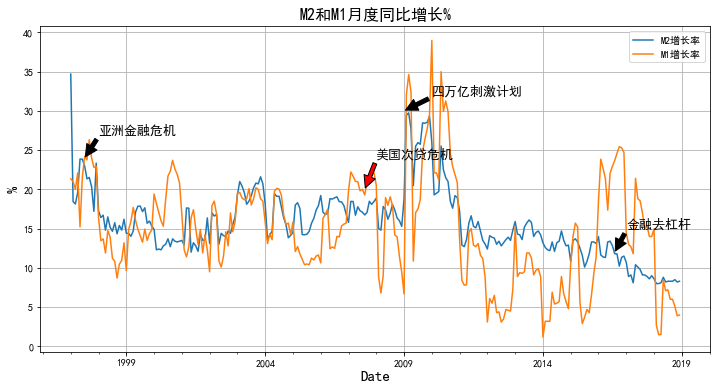

In [8]:
df[['M2增长率','M1增长率']].plot(figsize=(12,6))
plt.xlabel('Date',size = 15)
plt.ylabel('%',size = 15)
plt.title('M2和M1月度同比增长%',size=16)

plt.annotate('亚洲金融危机',size=13,xy=('1997-7-1',24),
            xytext=('1998-1-1',27),arrowprops=dict(facecolor='black',shrink=0.05),)

plt.annotate('美国次贷危机',size=13,xy=('2007-8-1',20),
            xytext=('2008-1-1',24),arrowprops=dict(facecolor='red',shrink=0.05),)

plt.annotate(u'四万亿刺激计划',size=13,xy=('2009-1-1',30),
            xytext=('2010-1-1',32),arrowprops=dict(facecolor='black',shrink=0.05),)

plt.annotate(u'金融去杠杆',size=13,xy=('2016-8-1',12),
            xytext=('2017-1-1',15),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.grid(True)

#从上图可以发现，我国ZF推行的“四万亿刺激计划”使M2和M1的增长率达到峰值，而2017年以来，随着金融去杠杆，M2增长率一直处于下滑中。
很遗憾，由于数据缺失，不能与前面93、94年高通货膨胀时期联系起来看。


In [9]:
MoneySupplyYear = ts.get_money_supply_bal()
MoneySupplyYear = MoneySupplyYear.sort_values('year')
MoneySupplyYear.to_csv('E:\\300 数据时代\\数据分析\\MoneySupplyYear.csv')
#GDP数据
GDP = ts.get_gdp_year()
GDP = GDP.sort_values('year')
GDP.to_csv('E:\\300 数据时代\\数据分析\\GDPyear.csv')

df1 = pd.read_csv('E:\\300 数据时代\\数据分析\\GDPyear.csv',engine='python')
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y')
#重新设定日期
df1 = pd.read_csv('E:\\300 数据时代\\数据分析\\MoneySupplyYear.csv',engine='python',parse_dates=['year'],
                 index_col='year',date_parser=dateparse)
df2 = pd.read_csv('E:\\300 数据时代\\数据分析\\GDPyear.csv',engine='python',parse_dates=['year'],
                 index_col='year',date_parser=dateparse)
#将year变量作为pandas数据框架的index导入
df2=df2[38:]
#先使用pandas创建一个空的数据集，再将货币供应量数据和GDP数据装进去
df = pd.DataFrame()
df["M2/GDP"]=df1['m2']/df2['gdp']
#M2/gdp比率
df['M1/GDP']=df1['m1']/df2['gdp']
#M1/gdp比率
df.head()



,M2/GDP,M1/GDP
year,,
1990-01-01,0.819240,0.372336
1991-01-01,0.888364,0.396359
1992-01-01,0.943495,0.435735
1993-01-01,0.987148,0.460759
1994-01-01,0.973559,0.426174


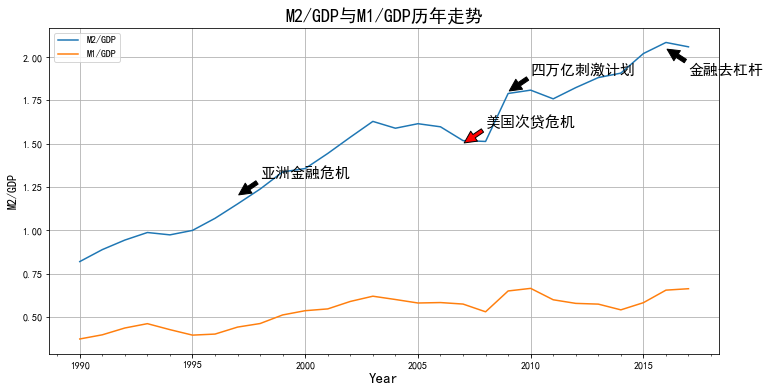

In [10]:
df[["M2/GDP","M1/GDP"]].plot(figsize=(12,6))
plt.xlabel('Year',size=15)
plt.ylabel('M2/GDP',size=12)
plt.title('M2/GDP与M1/GDP历年走势',size=18)

plt.annotate('亚洲金融危机',size=15,xy=('1997-7-1',1.2),
            xytext=('1998-1-1',1.3),arrowprops=dict(facecolor='black',shrink=0.05),)

plt.annotate('美国次贷危机',size=15,xy=('2007-8-1',1.5),
            xytext=('2008-1-1',1.6),arrowprops=dict(facecolor='red',shrink=0.05),)

plt.annotate(u'四万亿刺激计划',size=15,xy=('2009-1-1',1.8),
            xytext=('2010-1-1',1.9),arrowprops=dict(facecolor='black',shrink=0.05),)

plt.annotate(u'金融去杠杆',size=15,xy=('2016-8-1',2.05),
            xytext=('2017-1-1',1.9),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.grid(True)


#从上图不难看出,M2/GDP总体上是曲折上升的，从1990年的不到90%到2017年的接近220%。2017年以来，尽管经济增长一直处于下行空间，但在金融去杠杆的
影响下，广义货币供应量持续下滑，导致M2/GDP出现下降趋势。

很多“专家”会经常使用M2/GDP指标来解读经济质量、通胀和危机，认为M2越高，货币发行量越大，所以通胀越严重；M2/GDP越高，GDP增长需要M2越高，
货币供给不足，GDP增速会下降。特别是当2009年后中国M2绝对值超过美国，更为各界诟病，普遍认为中国存在巨大的货币隐患，它可能导致通胀失控、
产生泡沫甚至经济危机。

那么到底中国M2/GDP高企的本质是什么？成因何在？是不是导致中国通胀的根本原因？它对经济和金融系统稳定究竟有多大危害？这些都是值得进一步
探讨的问题。

从现有文献来看，M2/GDP并不存在所谓的最优比例，而且由于种种客观原因，不同经济体之间并不具备可比性。尽管M2/GDP指标通常反映了金融机构发展在
市场中的重要程度或者对于个人储蓄的贡献，但作为传统的金融深化指标，两者只在成熟金融系统中呈正相关趋势，在一个借贷受限制的不成熟市场中，两
者往往反而是负相关趋势。Elhiraika研究指出M2/GDP对于金融深化的衡量可能并不贴切，因为M2/GDP畸高可能是金融市场不发达的讯号，而高度成熟的金融
市场这一比例反而较低，因为后者通常持有与之经济相适应的货币量。Shunsuke Bando(1998)的分析中还注意到，对M2/GDP的分析必须结合M1/GDP这一比例，
在M1/GDP稳定增长下的M2/GDP的增长才反映了亚洲经济体市场下金融机构提供相对长期的资金，如从家庭储蓄向工业部门的转移，但也须注意到，资本的非
完全有效给这一分析带来的偏差，如资产泡沫、银行不良贷款的积淀等。并且，只有在扣除通货膨胀因素之后才能得到Marshallian K的真实增长率。


In [11]:
gdp_for = ts.get_gdp_for()
gdp_for.head()
gdp_for =gdp_for.sort_values('year')
gdp_for.to_csv('E:\\300 数据时代\\数据分析\\gdp_for.csv')
#三大需求对GDP的贡献

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y')
df = pd.read_csv('E:\\300 数据时代\\数据分析\\gdp_for.csv',engine='python',parse_dates=['year'],
                index_col='year',date_parser=dateparse)
df.rename(columns={'end_for':'消费贡献率','asset_for':'投资贡献率',
                  'goods_for':'净出口贡献率'},inplace=True)
#重命名
df.head()

,Unnamed: 0,消费贡献率,for_rate,投资贡献率,asset_rate,净出口贡献率,goods_rate
year,,,,,,,
1978-01-01,39,39.4,4.6,66.0,7.7,-5.4,-0.6
1979-01-01,38,87.3,6.6,15.4,1.2,-2.7,-0.2
1980-01-01,37,71.8,5.6,26.4,2.1,1.8,0.1
1981-01-01,36,93.4,4.9,-4.3,-0.2,10.9,0.5
1982-01-01,35,64.7,5.9,23.8,2.2,11.5,1.0


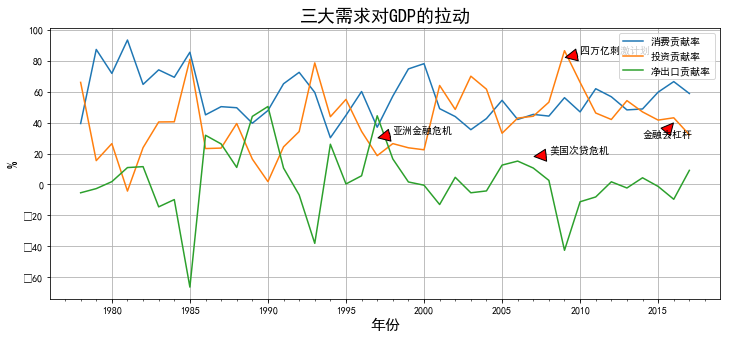

In [13]:
df[["消费贡献率","投资贡献率","净出口贡献率"]].plot(figsize=(12,5))
plt.xlabel('年份',size = 15)
plt.ylabel('%',size = 15)
plt.title('三大需求对GDP的拉动',size = 18)

plt.annotate('亚洲金融危机',xy=('1997-7-1',30),
            xytext=('1998-1-1',33),arrowprops=dict(facecolor='red',shrink=0.05),)

plt.annotate('美国次贷危机',xy=('2007-8-1',18),
            xytext=('2008-1-1',20),arrowprops=dict(facecolor='red',shrink=0.05),)

plt.annotate(u'四万亿刺激计划',xy=('2009-1-1',82),
            xytext=('2010-1-1',85),arrowprops=dict(facecolor='red',shrink=0.05),)

plt.annotate(u'金融去杠杆',xy=('2016-8-1',40),
            xytext=('2014-1-1',30),arrowprops=dict(facecolor='red',shrink=0.05),)
plt.grid(True)


#这里发现一个有趣的现象，净出口贡献率大多时候是负的，但这并不意味着外贸在拖经济后退。实际上，净出口贡献率这一概念只有统计意义，没有经济意义。
用这个指标来衡量，会低估外贸对经济增长的贡献度。根据经济学理论，一国国内生产总值(GDP)可分解为总投资、总消费和净出口(包括货物出口及服务出口)
三个部分。净出口是指出口额与进口额之差，净出口对经济增长的贡献率是指净出口增量与GDP增量之比，即：
净出口对GDP增长的贡献率=净出口增量/GDP增量×100%。
